# 1. 필요 라이브러리 import

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge

# 2. 사용 데이터 확인

In [105]:
df = pd.read_csv("/content/movie_ratings.csv", index_col = 0)
df.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,movie_title,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      100000 non-null  int64 
 1   movie_id     100000 non-null  int64 
 2   rating       100000 non-null  int64 
 3   timestamp    100000 non-null  int64 
 4   age          100000 non-null  int64 
 5   gender       100000 non-null  object
 6   occupation   100000 non-null  object
 7   movie_title  100000 non-null  object
 8   unknown      100000 non-null  int64 
 9   Action       100000 non-null  int64 
 10  Adventure    100000 non-null  int64 
 11  Animation    100000 non-null  int64 
 12  Children's   100000 non-null  int64 
 13  Comedy       100000 non-null  int64 
 14  Crime        100000 non-null  int64 
 15  Documentary  100000 non-null  int64 
 16  Drama        100000 non-null  int64 
 17  Fantasy      100000 non-null  int64 
 18  Film-Noir    100000 non-null  int64 
 19  Hor

In [107]:
# 중복값 확인
df.duplicated().sum()

0

In [108]:
# 행당 순서의 열에 있는 값들을 확인하는 함수
def unique_value(col_index) :
    result = df.iloc[:, col_index].unique()
    result.sort()
    print(f"유니크 값의 개수 : {len(result)}")
    print(f"유니크 값들 : {result}")
    return

In [109]:
unique_value(1)

유니크 값의 개수 : 1682
유니크 값들 : [   1    2    3 ... 1680 1681 1682]


# 3. 데이터 EDA
1. 서브 데이터프레임 생성 
2. 시각화 진행

## 1. 서브 데이터프레임 생성

In [110]:
# 영화ID가 같은 데이터를 제거한 서브 데이터프레임 생성
sub_df = df.drop_duplicates(['movie_id'])
sub_df

,user_id,movie_id,rating,timestamp,age,gender,occupation,movie_title,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
117,196,393,4,881251863,49,M,writer,Mrs. Doubtfire (1993),0,0,...,0,0,0,0,0,0,0,0,0,0
309,196,381,4,881251728,49,M,writer,Muriel's Wedding (1994),0,0,...,0,0,0,0,0,1,0,0,0,0
409,196,251,3,881251274,49,M,writer,Shall We Dance? (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
455,196,655,5,881251793,49,M,writer,Stand by Me (1986),0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,863,1679,3,889289491,17,M,student,B. Monkey (1998),0,0,...,0,0,0,0,0,1,0,1,0,0
99996,863,1678,1,889289570,17,M,student,Mat' i syn (1997),0,0,...,0,0,0,0,0,0,0,0,0,0
99997,863,1680,2,889289570,17,M,student,Sliding Doors (1998),0,0,...,0,0,0,0,0,1,0,0,0,0
99998,896,1681,3,887160722,28,M,writer,You So Crazy (1994),0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
# 장르별 정보를 나타내기 위한 딕셔너리 생성
genre = {
    "genre_name" : [],
    "number_of_movie" : [],
    "ratings_average" : []
}

for index in range(8, 27) :
    genre_name = sub_df.columns[index]
    genre["genre_name"].append(genre_name)
    genre["number_of_movie"].append(len(sub_df[sub_df[genre_name] == 1]))
    genre["ratings_average"].append(df[df[genre_name] == 1].rating.mean().round(2))

# 데이터프레임으로 변경
genre_df = pd.DataFrame({
    'genre_name' : genre["genre_name"],
    'number_of_movie' : genre["number_of_movie"],
    'ratings_average' : genre["ratings_average"]
})
genre_df

,genre_name,number_of_movie,ratings_average
0,unknown,2,3.20
1,Action,251,3.48
2,Adventure,135,3.50
3,Animation,42,3.58
4,Children's,122,3.35
5,Comedy,505,3.39
6,Crime,109,3.63
7,Documentary,50,3.67
8,Drama,725,3.69
9,Fantasy,22,3.22


## 2. 시각화 진행

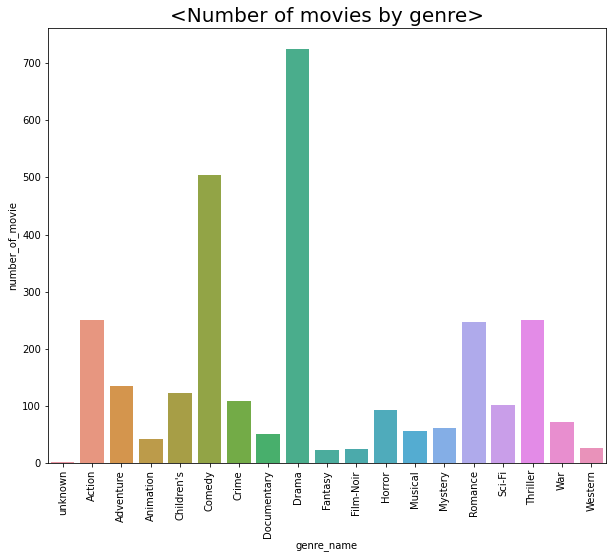

In [112]:
# 장르별 영화 개수 시각화
plt.figure(figsize=(10, 8))
plt.title('<Number of movies by genre>', fontsize=20)
sns.barplot(data= genre_df,x='genre_name', y='number_of_movie')
plt.xticks(rotation=90)
plt.show()

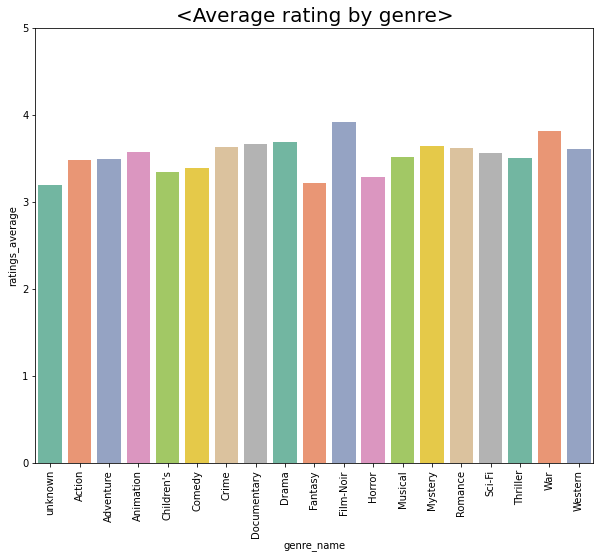

In [130]:
# 장르별 점수 평균 시각화
plt.figure(figsize=(10, 8))
plt.title('<Average rating by genre>', fontsize=20)
plt.ylim(0, 5)
sns.barplot(data= genre_df,x='genre_name', y='ratings_average', palette='Set2')
plt.xticks(rotation=90)
plt.show()

# 4. 머신러닝 진행
1. 학습 데이터와 테스트 데이터 분리
2. 기준모델 생성
3. CB모델 생성

## 1. 학습 데이터와 테스트 데이터 분리

In [177]:
# 특성과 타겟 구분
target = 'rating'
features = df.drop(columns=[target]).columns

# 학습데이터와 테스트 데이터 분리
train_set, test_set = train_test_split(df, test_size=0.2, shuffle=True, random_state=3)

X_test = test_set[features]
y_test = test_set[target]

In [115]:
# 학습 데이터와 검증 데이터 분리
train_set, valid_set = train_test_split(train_set, test_size=0.2, random_state=3)

X_val = valid_set[features]
y_val = valid_set[target]

X_train = train_set[features]
y_train = train_set[target]

## 2. 기준 모델 생성(최빈값)

In [116]:
# 최빈값으로 기준모델 생성
base = y_val.mode()[0] 
baseline = len(y_val) * [base]

In [117]:
# 기준모델 평가
baseline_mae = mean_absolute_error(y_val, baseline)
baseline_mse = mean_squared_error(y_val, baseline)
baseline_rmse = np.sqrt(baseline_mse)

print('기준모델의 MAE :', baseline_mae)
print('기준모델의 RMSE :', baseline_rmse)

기준모델의 MAE : 0.9044375
기준모델의 RMSE : 1.2307264115147607


## 3. CB 모델 생성
1. 샘플데이터로 단계별 진행
2. 모듈화 및 전체 데이터 테스트

### 3-1. 샘플데이터로 단계별 진행

CB의 장점

* User Independence: CB는 한 user만의 Profile을 만들기 때문에, user의 선호도가 높은 아이템을 추천한다.

* Transparency: 추천을 한 이유가 타당하다. 추천된 아이템의 특성을 보면, 유저가 과거에 어떤 특성을 좋아했고 이와 얼마나 유사한지 비교할 수 있다.

* New Item: 새로 등록한 아이템도 추천이 가능하다.

 
CB의 단점

* Limited Content Analysis: CB Filtering은 아이템 추천에 사용할 특성의 수가 제한적이며, 이 때문에 도메인에 한정적이다.

* Over-specializaion: CB는 유저가 좋아했던 아이템과 비슷한 특성을 가진 아이템을 추천하기 때문에 예상치 못한 아이템을 추천할 수 있다. 이 문제를 Serendipiry Problem라 한다.

(계획) <br>
: CB는 한 유저와 다양한 영화 정보를 바탕으로 한 유저의 프로필을 만든다고 생각 -> 유저의 정보는 제외하고 영화의 정보를 가지고  CountVectorizer를 계산


In [118]:
# 유저 id별로 평가 개수 확인 -> 평가 개수가 적은 유저 id는 제거하기 위해
df['user_id'].value_counts()

405    737
655    685
13     636
450    540
276    518
      ... 
36      20
418     20
147     20
34      20
571     20
Name: user_id, Length: 943, dtype: int64

In [167]:
# 유저 id별로 훈련, 검증, 테스트 데이터를 분리하는 함수
def split_data(df, user_id) :
    df_sample = df[df['user_id'] == user_id]
    target = 'rating'
    features = df_sample.drop(columns=['user_id', 'rating', 'timestamp', 'age', 'gender','occupation', 'movie_title']).columns

    # 테스트 데이터 분리
    train_set, test_set = train_test_split(df_sample, test_size=0.2, shuffle=True, random_state=3)
    X_test = test_set[features]
    y_test = test_set[target]

    # 훈련, 검증 데이터 분리
    train_set, valid_set = train_test_split(train_set, test_size=0.2, random_state=3)
    X_val = valid_set[features]
    y_val = valid_set[target]
    X_train = train_set[features]
    y_train = train_set[target]
    
    return X_test, y_test, X_val, y_val, X_train, y_train

In [168]:
# 학습 모델을 생성하는 함수
def train_model(X_train, y_train, model=Ridge()):
    model.fit(X_train, y_train)
    return model

# 예측을 진행하는 함수
def predict_rating(X, model):
    preds = model.predict(X)
    return preds

In [169]:
# 모델 테스트를 위한 샘플 데이터 생성
X_test, y_test, X_val, y_val, X_train, y_train = split_data(df, 276)

In [170]:
# 모델 생성 및 평점 예측
model = train_model(X_train, y_train)
preds = predict_rating(X_val, model)

# 평가 진행
model_val_mae = mean_absolute_error(y_val, preds)
model_val_mse = mean_squared_error(y_val, preds)
model_val_rmse = np.sqrt(model_val_mse)

print('생성 모델의 검증데이터 MAE :', model_val_mae)
print('생성 모델의 검증데이터 RMSE :', model_val_rmse)

생성 모델의 검증데이터 MAE : 0.7392088658845007
생성 모델의 검증데이터 RMSE : 0.9322491412432514


In [171]:
# 테스트 데이터로 평점 예측
preds = predict_rating(X_test, model)

# 평가 진행
model_test_mae = mean_absolute_error(y_test, preds)
model_test_mse = mean_squared_error(y_test, preds)
model_test_rmse = np.sqrt(model_test_mse)

print('생성 모델의 테스트데이터 MAE :', model_test_mae)
print('생성 모델의 테스트데이터 RMSE :', model_test_rmse)

생성 모델의 테스트데이터 MAE : 0.7289859967515336
생성 모델의 테스트데이터 RMSE : 0.9245720716692877


In [172]:
# 영화별 정보가 담긴 데이터프레임 생성
movie_df = df.drop_duplicates(['movie_id'])
movie_inform_df = movie_df.drop(columns=['user_id', 'rating', 'timestamp', 'age', 'gender', 'occupation'])
movie_inform_df

,movie_id,movie_title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,242,Kolya (1996),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
117,393,Mrs. Doubtfire (1993),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
309,381,Muriel's Wedding (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
409,251,Shall We Dance? (1996),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
455,655,Stand by Me (1986),0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
99996,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
99998,1681,You So Crazy (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
moive_list_trained = X_train['movie_id'].to_list() # 학습에 사용한 영화 리스트
moive_list_not_trained = movie_inform_df[~movie_inform_df['movie_id'].isin(moive_list_trained)] # 학습에 사용하지 않은 영화 리스트
movie_features = moive_list_not_trained.drop(columns=['movie_title']) # 학습에 사용할 특성 추출
movie_features

,movie_id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,242,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
309,381,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
409,251,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
785,306,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1137,663,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
99996,1678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
99997,1680,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
99998,1681,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [175]:
# 영화별 예측 평점을 데이터프레임으로 생성
preds = predict_rating(movie_features, model)
predict_ratings = pd.DataFrame({'movie_id' : moive_list_not_trained['movie_id'],
              'movie_title' : moive_list_not_trained['movie_title'],
              'predict_rating' : preds})

# 예측 평정 상위 5개를 출력
predict_ratings.sort_values('predict_rating', ascending=False).head()

,movie_id,movie_title,predict_rating
13342,299,Hoodlum (1997),4.636426
31757,89,Blade Runner (1982),4.599908
45016,32,Crumb (1994),4.484124
66503,48,Hoop Dreams (1994),4.467322
98947,75,Brother Minister: The Assassination of Malcolm...,4.438967


### 3-2. 모듈화 및 전체 데이터 테스트

In [196]:
# 영화를 추천하는 함수
def recommend_movie (user_id, recommend_num) : 
    '''
    user_id : 추천을 받고싶은 유저의 ID
    recommend_num : 추천받을 영화의 개수
    '''

    # 데이터 분리
    X_test, y_test, X_val, y_val, X_train, y_train = split_data(df, user_id)

    # 모델 생성
    model = train_model(X_train, y_train)

    # 검증데이터 평가
    preds = predict_rating(X_val, model)
    model_val_mae = mean_absolute_error(y_val, preds)
    model_val_mse = mean_squared_error(y_val, preds)
    model_val_rmse = np.sqrt(model_val_mse)
    print('---검증데이터 평가내용---')
    print('생성 모델의 MAE :', model_val_mae)
    print('생성 모델의 RMSE :', model_val_rmse)

    # 테스트데이터 평가
    preds = predict_rating(X_test, model)
    model_test_mae = mean_absolute_error(y_test, preds)
    model_test_mse = mean_squared_error(y_test, preds)
    model_test_rmse = np.sqrt(model_test_mse)
    print('---테스트데이터 평가내용---')
    print('생성 모델의 MAE :', model_test_mae)
    print('생성 모델의 RMSE :', model_test_rmse)

    # 영화별 정보가 담긴 데이터프레임 생성
    movie_df = df.drop_duplicates(['movie_id'])
    movie_inform_df = movie_df.drop(columns=['user_id', 'rating', 'timestamp', 'age', 'gender', 'occupation'])

    # 학습에 사용하지 않은 데이터 추출
    moive_list_trained = X_train['movie_id'].to_list() 
    moive_list_not_trained = movie_inform_df[~movie_inform_df['movie_id'].isin(moive_list_trained)]
    movie_features = moive_list_not_trained.drop(columns=['movie_title'])

    # 영화별 예측 평점을 데이터프레임으로 생성
    preds = predict_rating(movie_features, model)
    predict_ratings = pd.DataFrame({'movie_id' : moive_list_not_trained['movie_id'],
                                    'movie_title' : moive_list_not_trained['movie_title'],
                                    'predict_rating' : preds})

    # 예측 평정 상위 n개를 리턴
    predict_ratings_n = predict_ratings.sort_values('predict_rating', ascending=False).head(recommend_num)
    
    return predict_ratings_n[['movie_id', 'movie_title']]

In [197]:
# 전체 데이터로 테스트 진행
recommend_movie(276, 5)

---검증데이터 평가내용---
생성 모델의 MAE : 0.7392088658845007
생성 모델의 RMSE : 0.9322491412432514
---테스트데이터 평가내용---
생성 모델의 MAE : 0.7289859967515336
생성 모델의 RMSE : 0.9245720716692877


,movie_id,movie_title
13342,299,Hoodlum (1997)
31757,89,Blade Runner (1982)
45016,32,Crumb (1994)
66503,48,Hoop Dreams (1994)
98947,75,Brother Minister: The Assassination of Malcolm...


# 별도 테스트(프로젝트에 들어가지 않는 개인 테스트)

In [198]:
df[df['user_id'] == 34]

,user_id,movie_id,rating,timestamp,age,gender,occupation,movie_title,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
39,34,242,5,888601628,38,F,administrator,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1986,34,286,5,888602513,38,F,administrator,"English Patient, The (1996)",0,0,...,0,0,0,0,0,1,0,0,1,0
10770,34,288,2,888601628,38,F,administrator,Scream (1996),0,0,...,0,0,1,0,0,0,0,1,0,0
13363,34,299,5,888602923,38,F,administrator,Hoodlum (1997),0,0,...,0,1,0,0,0,0,0,0,0,0
15501,34,332,5,888602742,38,F,administrator,Kiss the Girls (1997),0,0,...,0,0,0,0,0,0,0,1,0,0
19032,34,294,1,888602808,38,F,administrator,Liar Liar (1997),0,0,...,0,0,0,0,0,0,0,0,0,0
36055,34,310,4,888601628,38,F,administrator,"Rainmaker, The (1997)",0,0,...,0,0,0,0,0,0,0,0,0,0
38057,34,324,5,888602808,38,F,administrator,Lost Highway (1997),0,0,...,0,0,0,0,1,0,0,0,0,0
67376,34,259,2,888602808,38,F,administrator,George of the Jungle (1997),0,0,...,0,0,0,0,0,0,0,0,0,0
70583,34,245,4,888602923,38,F,administrator,"Devil's Own, The (1997)",0,1,...,0,0,0,0,0,0,0,1,1,0
